In [1]:
import pandas as pd
import torch
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def convert_to_tensors(df_train, df_test, df_valid):
    X_train = torch.tensor(df_train[['x1', 'x2']].values, dtype=torch.float32)
    y_train = torch.tensor(df_train['label'].values, dtype=torch.float32)

    X_test = torch.tensor(df_test[['x1', 'x2']].values, dtype=torch.float32)
    y_test = torch.tensor(df_test['label'].values, dtype=torch.float32)

    X_valid = torch.tensor(df_valid[['x1', 'x2']].values, dtype=torch.float32)
    y_valid = torch.tensor(df_valid['label'].values, dtype=torch.float32)
    return X_train, y_train, X_test, y_test, X_valid, y_valid

In [3]:
def create_meshgrid(X_train):
    # This cell creates a mesh grid covering the input space that'll be used later to visualize the decision boundaries.
    # The idea is to pass a grid of points through the network, have it classify those points and then plot a heatmap

    x1_min, x1_max = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
    x2_min, x2_max = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5

    x1_range = np.linspace(x1_min, x1_max, 400)
    x2_range = np.linspace(x2_min, x2_max, 400)
    x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)

    # Flatten the grid to pass through the model
    grid_points = np.c_[x1_grid.ravel(), x2_grid.ravel()]
    grid_tensor = torch.tensor(grid_points, dtype=torch.float32)
    return x1_grid, x2_grid, grid_tensor

In [4]:
class BinaryClassifier(torch.nn.Module):
    def __init__(self, hl_size):
        super().__init__()
        self.layer1 = torch.nn.Linear(2,hl_size)
        self.layer2 = torch.nn.Linear(hl_size,1)
    def forward(self, x):
        o = self.layer1(x)
        o = torch.relu(o)
        o = self.layer2(o)
        o = torch.sigmoid(o)
        return o

def train_model(hl_size):
    model = BinaryClassifier(hl_size)
    loss_function = torch.nn.BCELoss()
    gd = torch.optim.Adam(model.parameters(), lr=0.01)

    epochs = 1000
    loss_array = []
    for epoch in range(epochs):
        predictions = model(X_train)
        loss = loss_function(predictions.squeeze(), y_train)
        loss.backward()
        gd.step()
        gd.zero_grad()
        loss_array.append(loss.item())
        # if epoch%100 == 0:
        #     print(f"Epoch {epoch+1}, Loss: {loss.item()}")
    
    model.eval()
    with torch.no_grad():
        predictions = model(X_test)
        loss = loss_function(predictions.squeeze(), y_test)

        decision_boundaries = model(grid_tensor)
        hard_boundaries = (decision_boundaries.numpy() > 0.5).astype(int)
        hard_boundaries = hard_boundaries.reshape(x1_grid.shape)

    print(f'\nTest Loss: {loss.item():.4f}')
    # print(list(model.parameters()))
    # Plot
    plt.figure(figsize=(12, 4))
    # Subplot 0: Loss curve
    plt.subplot(1, 4, 1)
    plt.plot(loss_array)
    plt.xlabel('Epoch')
    plt.ylabel('Training Loss')
    plt.title('Training Loss over Time')
    plt.grid(True)

    # Subplot 1: Training data
    plt.subplot(1, 4, 2)
    plt.contourf(x1_grid, x2_grid, hard_boundaries, levels=1, colors=['#ffcccc', '#ccccff'], alpha=0.6)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr', s=5, linewidths=1.5)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Training Set')
    plt.grid(True, alpha=0.3)

    # Subplot 2: Validation data
    plt.subplot(1, 4, 3)
    plt.contourf(x1_grid, x2_grid, hard_boundaries, levels=1, colors=['#ffcccc', '#ccccff'], alpha=0.6)
    plt.scatter(X_valid[:, 0], X_valid[:, 1], c=y_valid, cmap='bwr', s=5, linewidths=1.5)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Validation Set')
    plt.grid(True, alpha=0.3)

    # Subplot 3: Test data
    plt.subplot(1, 4, 4)
    plt.contourf(x1_grid, x2_grid, hard_boundaries, levels=1, colors=['#ffcccc', '#ccccff'], alpha=0.6)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='bwr', s=5, linewidths=1.5)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Test Set')
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

torch.Size([200, 2]) torch.Size([200]) torch.Size([200, 2]) torch.Size([200, 2])

Training model with hidden layer size 2, iteration 1

Test Loss: 0.1941


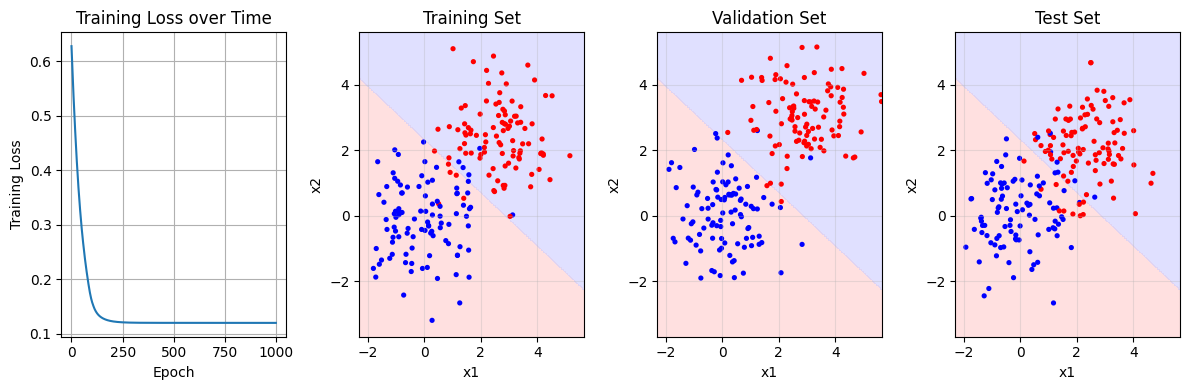


Training model with hidden layer size 2, iteration 2

Test Loss: 0.1950


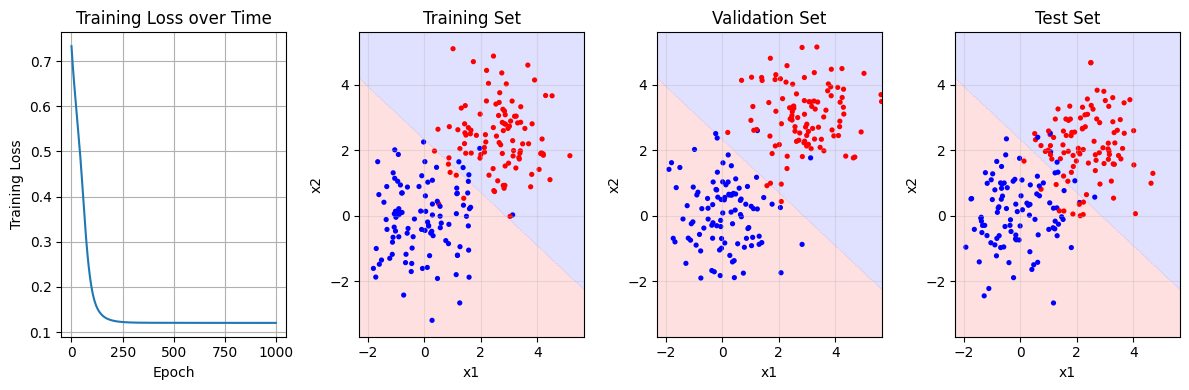


Training model with hidden layer size 2, iteration 3

Test Loss: 0.2009


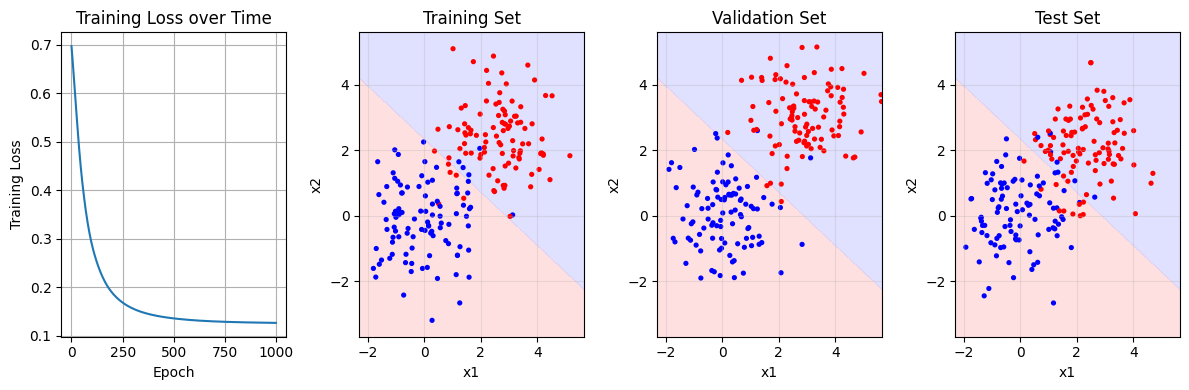


Training model with hidden layer size 3, iteration 1

Test Loss: 0.1891


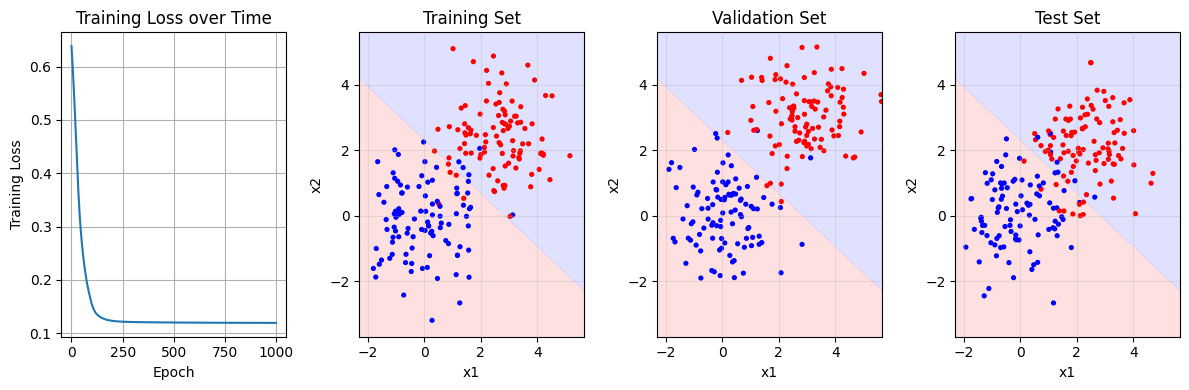


Training model with hidden layer size 3, iteration 2

Test Loss: 0.1871


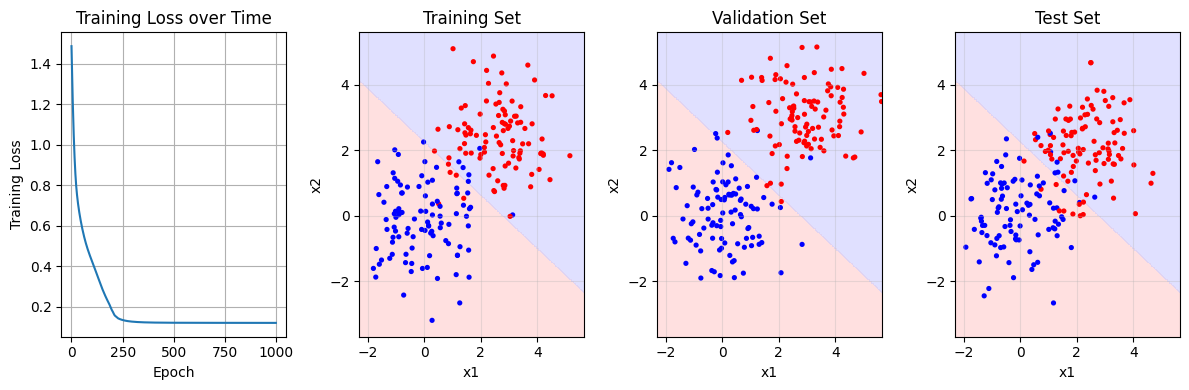


Training model with hidden layer size 3, iteration 3

Test Loss: 0.1852


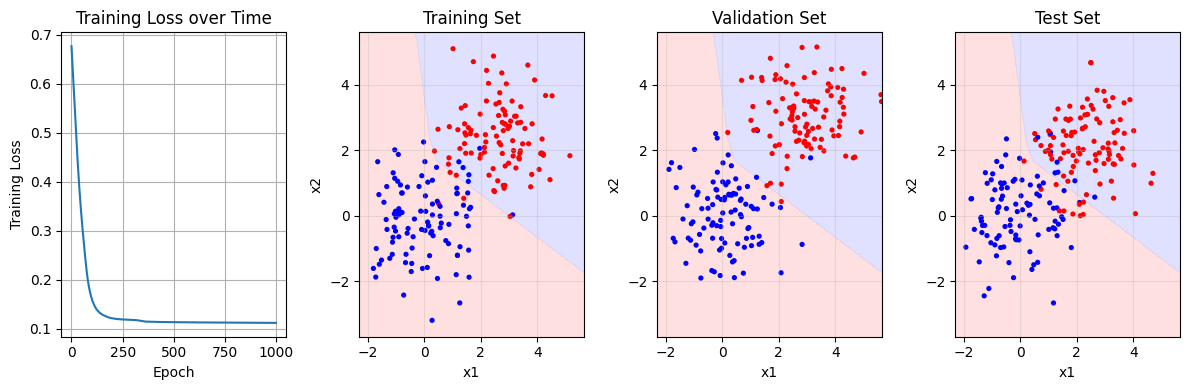


Training model with hidden layer size 4, iteration 1

Test Loss: 0.1950


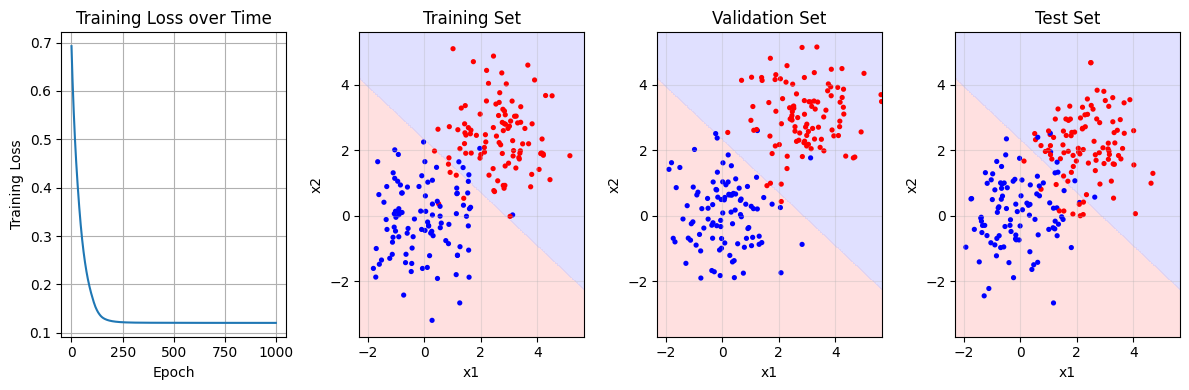


Training model with hidden layer size 4, iteration 2

Test Loss: 0.1999


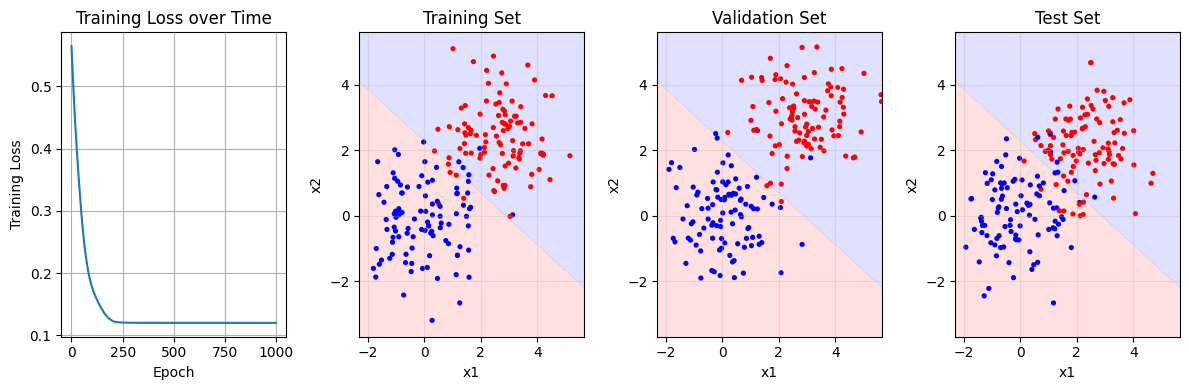


Training model with hidden layer size 4, iteration 3

Test Loss: 0.1911


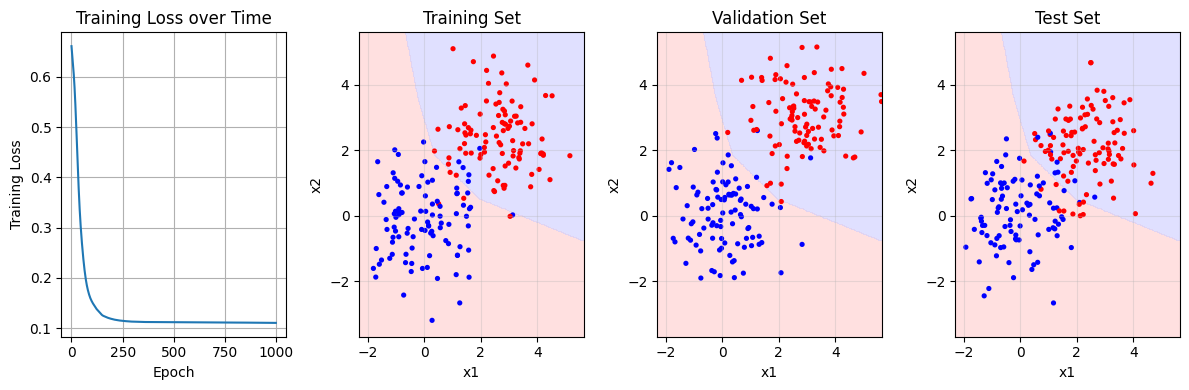


Training model with hidden layer size 5, iteration 1

Test Loss: 0.1827


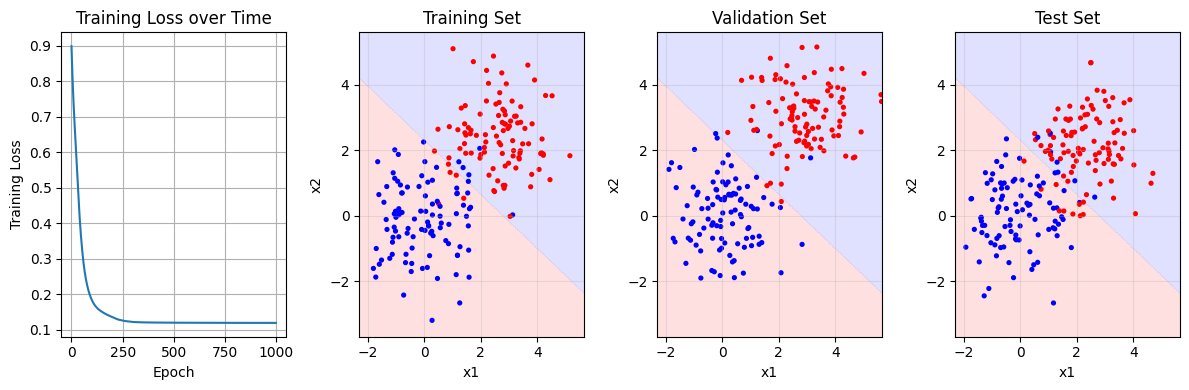


Training model with hidden layer size 5, iteration 2

Test Loss: 0.1998


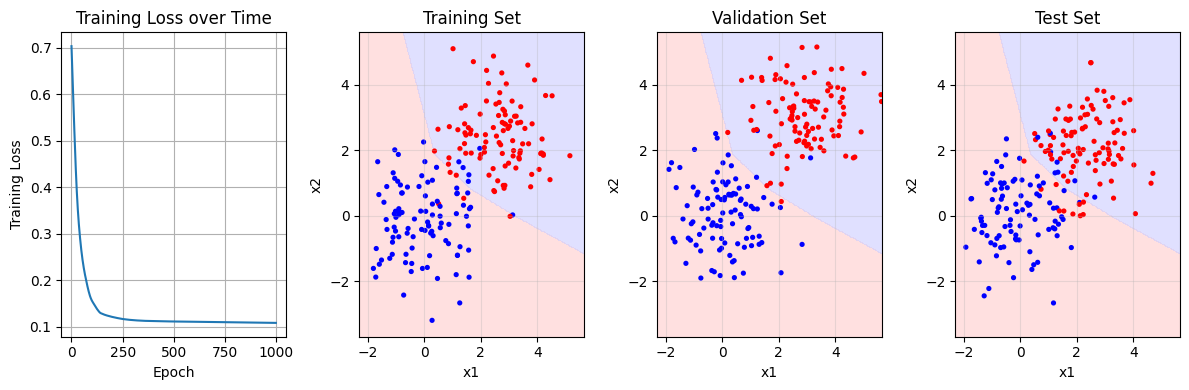


Training model with hidden layer size 5, iteration 3

Test Loss: 0.1797


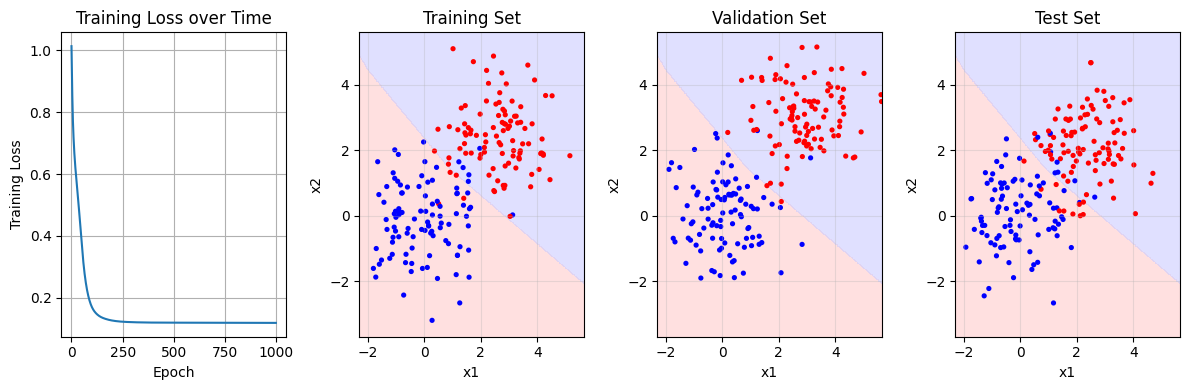


Training model with hidden layer size 6, iteration 1

Test Loss: 0.1865


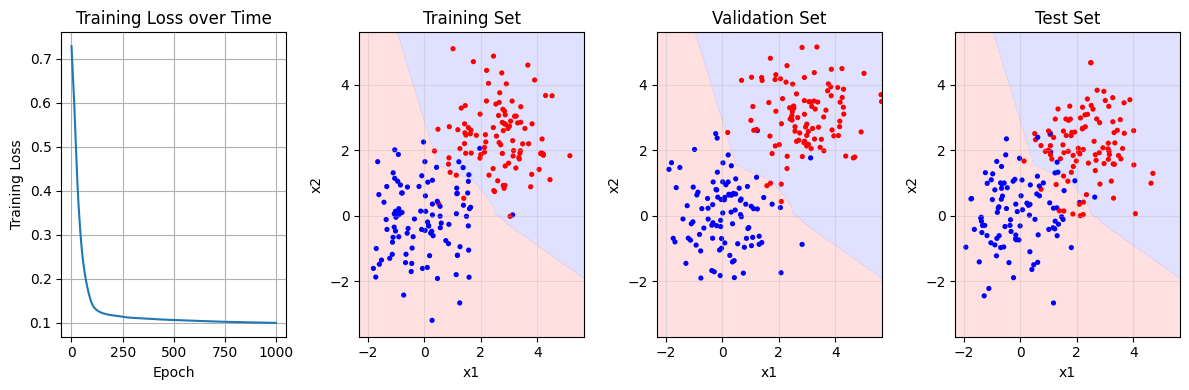


Training model with hidden layer size 6, iteration 2

Test Loss: 0.1891


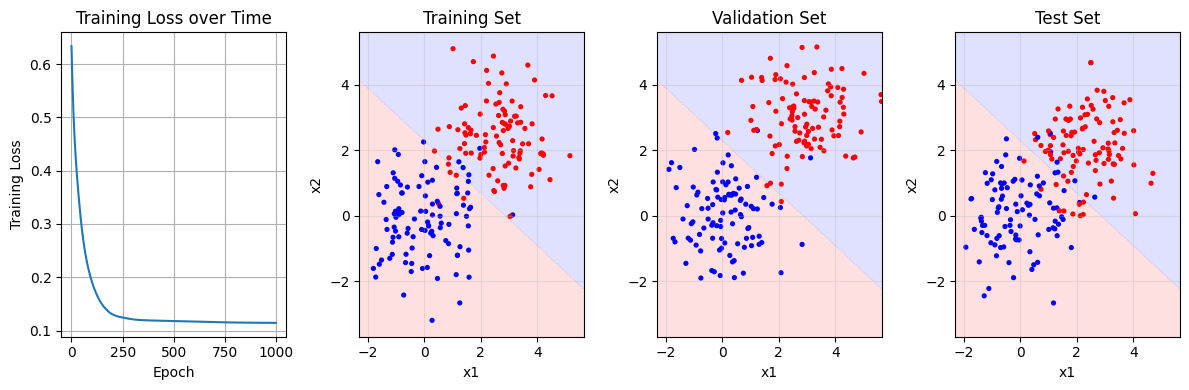


Training model with hidden layer size 6, iteration 3

Test Loss: 0.1867


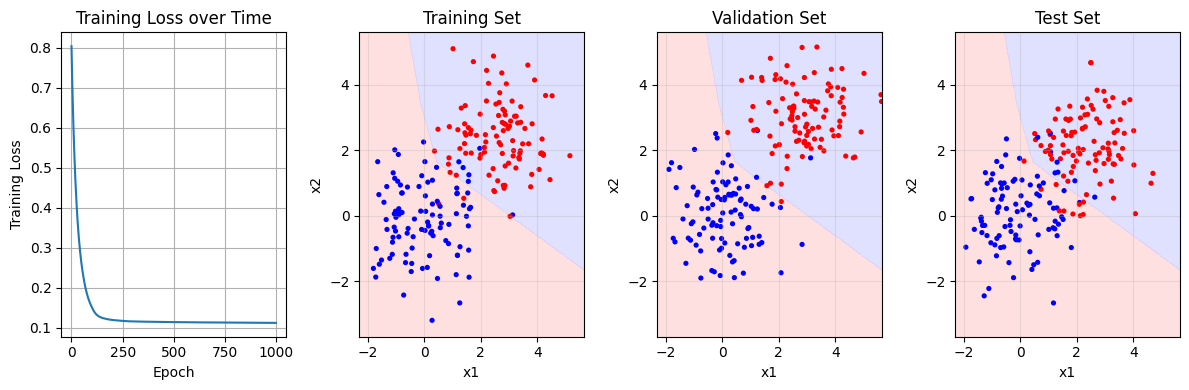


Training model with hidden layer size 7, iteration 1

Test Loss: 0.1954


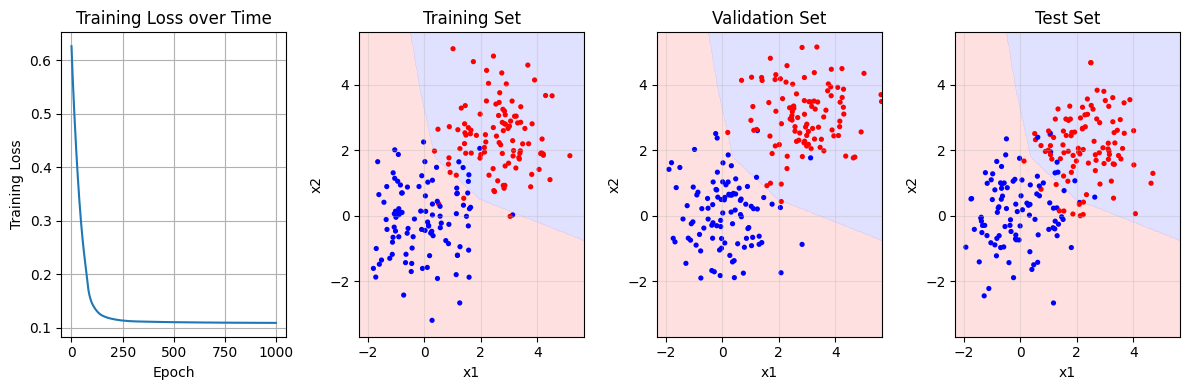


Training model with hidden layer size 7, iteration 2

Test Loss: 0.1849


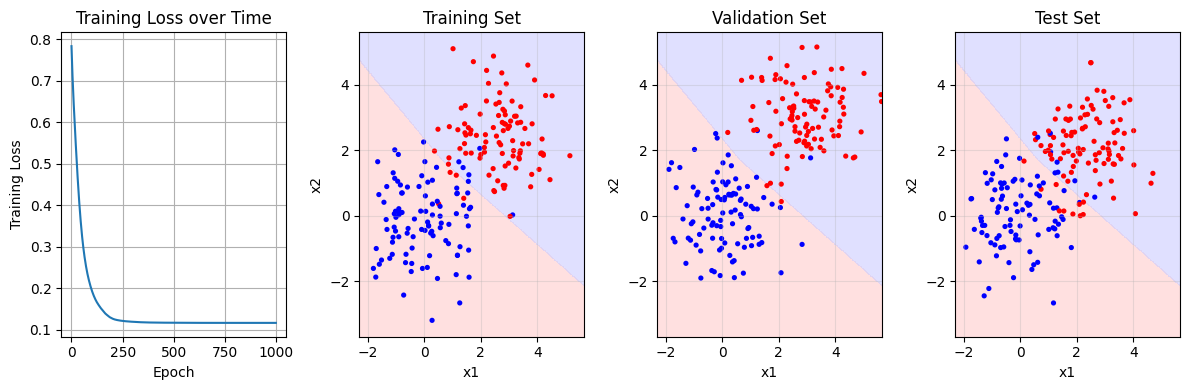


Training model with hidden layer size 7, iteration 3

Test Loss: 0.1852


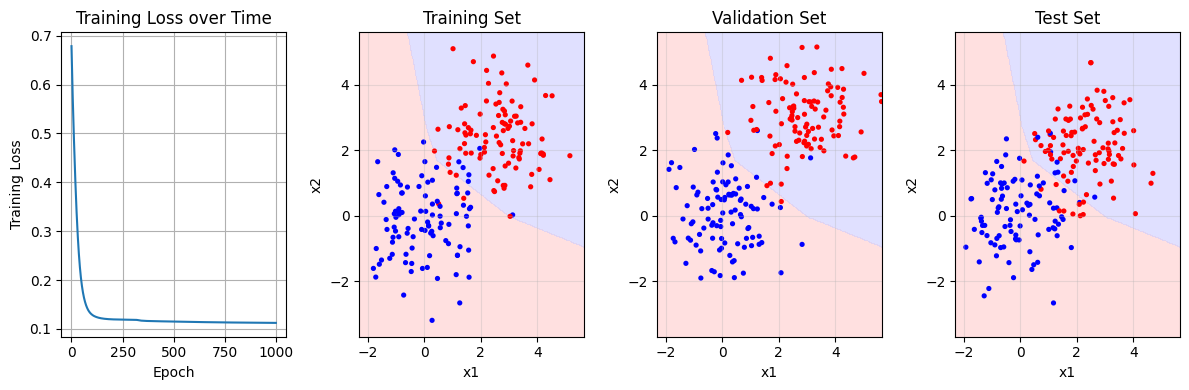

In [21]:
df_train = pd.read_csv('two_gaussians_train.csv')
df_test = pd.read_csv('two_gaussians_test.csv')
df_valid = pd.read_csv('two_gaussians_valid.csv')

X_train, y_train, X_test, y_test, X_valid, y_valid = convert_to_tensors(df_train, df_test, df_valid)
print(X_train.shape, y_train.shape, X_test.shape, X_valid.shape)
x1_grid, x2_grid, grid_tensor = create_meshgrid(X_train)

for i in range(2,8):
    for j in range(3):
        print(f'\nTraining model with hidden layer size {i}, iteration {j+1}')
        train_model(hl_size=i)

torch.Size([200, 2]) torch.Size([200]) torch.Size([200, 2]) torch.Size([200, 2])

Training model with hidden layer size 2, iteration 1

Test Loss: 0.6456


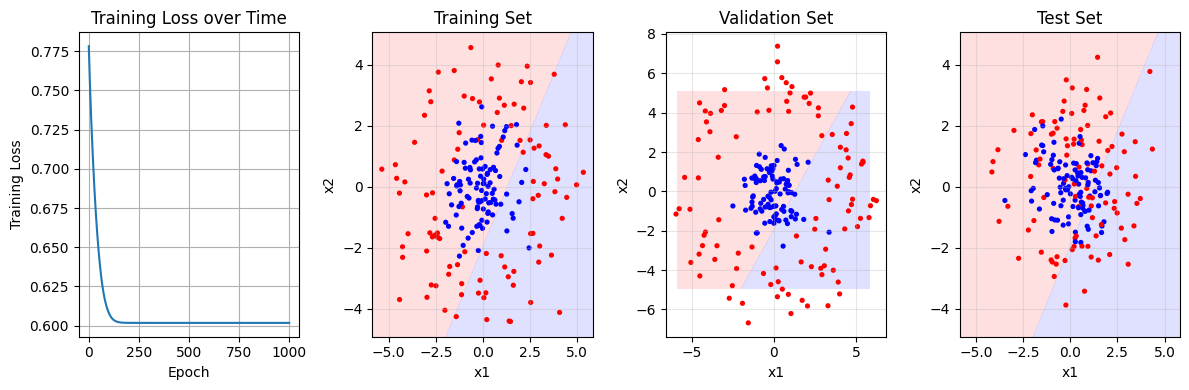


Training model with hidden layer size 2, iteration 2

Test Loss: 0.6957


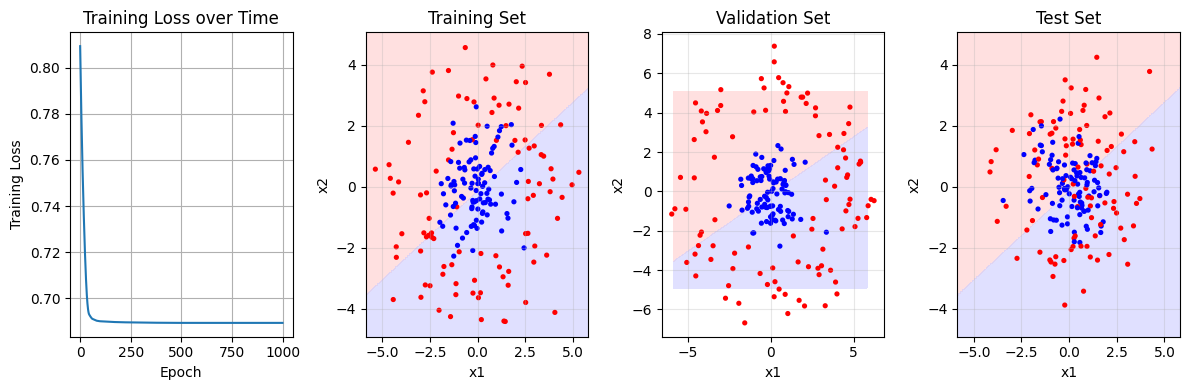


Training model with hidden layer size 2, iteration 3

Test Loss: 0.6035


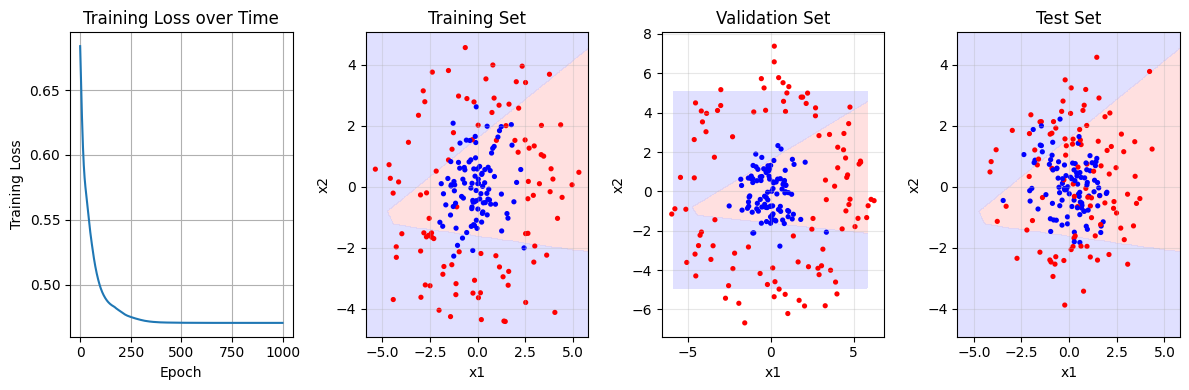


Training model with hidden layer size 3, iteration 1

Test Loss: 0.8668


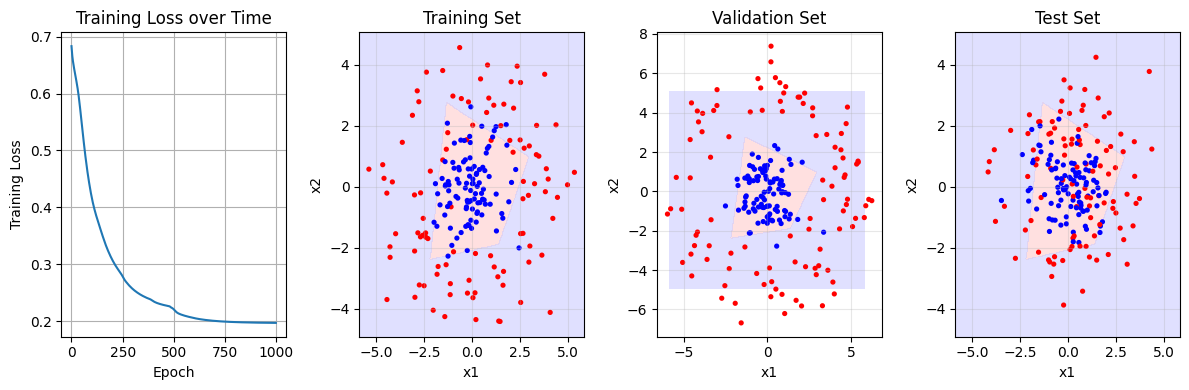


Training model with hidden layer size 3, iteration 2

Test Loss: 0.6751


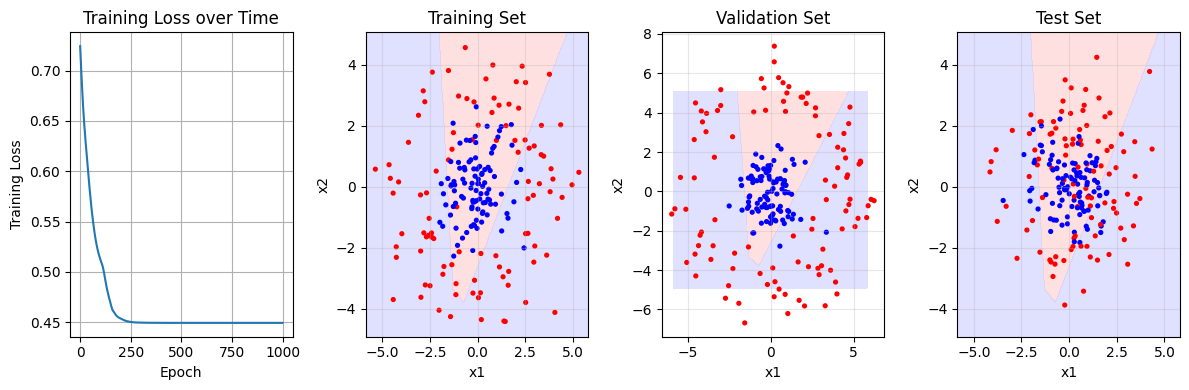


Training model with hidden layer size 3, iteration 3

Test Loss: 0.6476


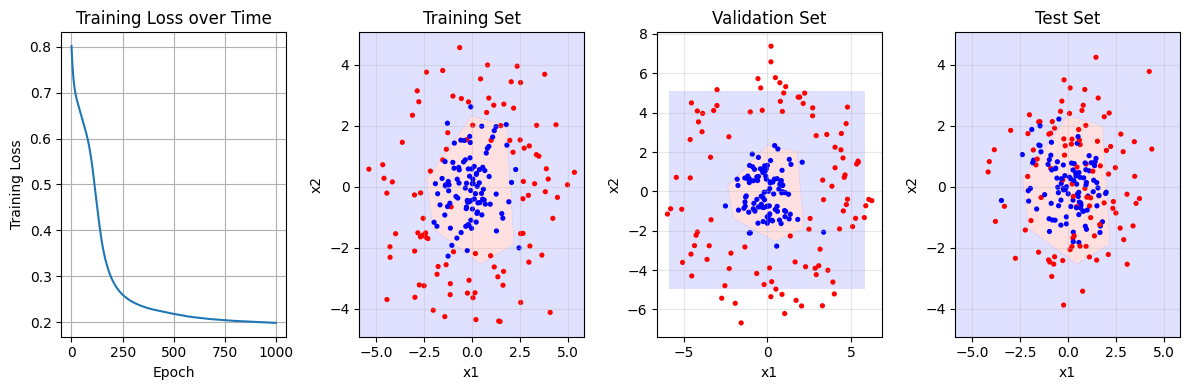


Training model with hidden layer size 4, iteration 1

Test Loss: 0.7356


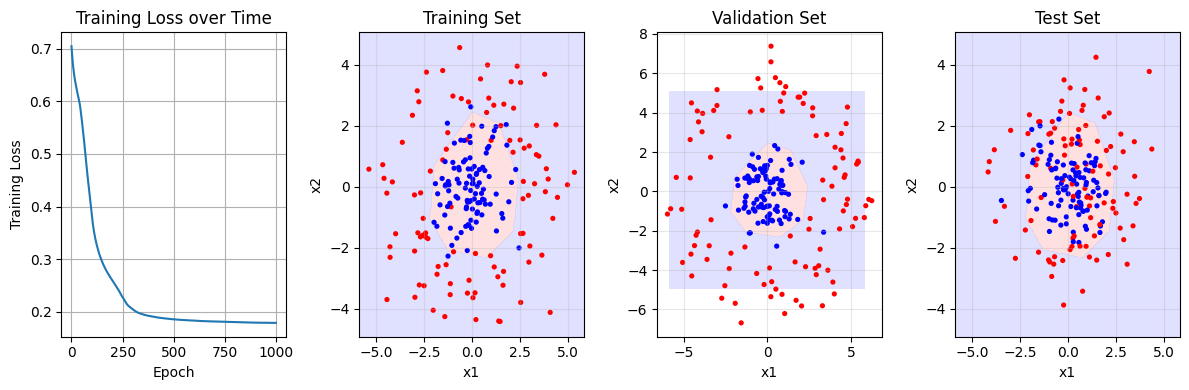


Training model with hidden layer size 4, iteration 2

Test Loss: 0.7371


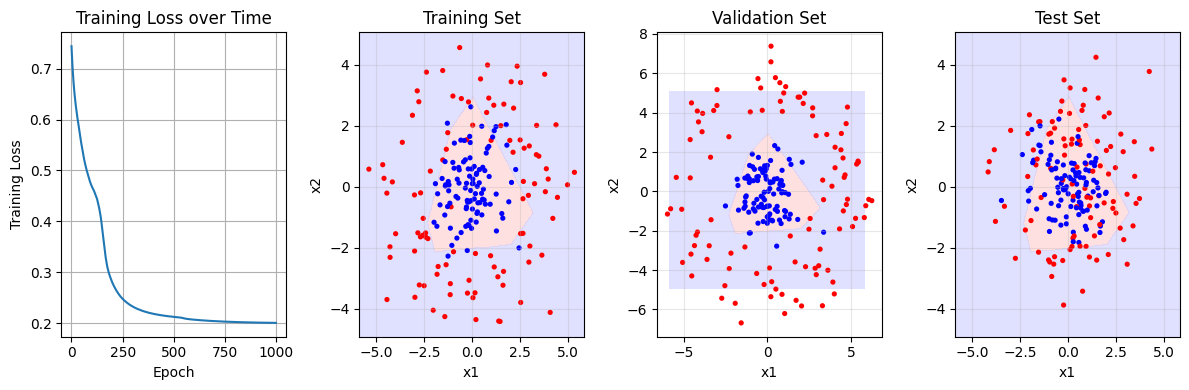


Training model with hidden layer size 4, iteration 3

Test Loss: 0.7904


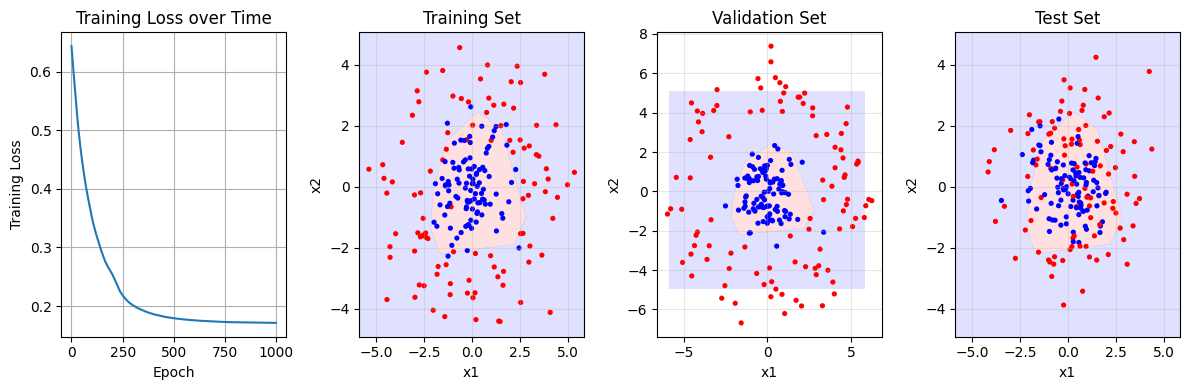


Training model with hidden layer size 5, iteration 1

Test Loss: 0.8016


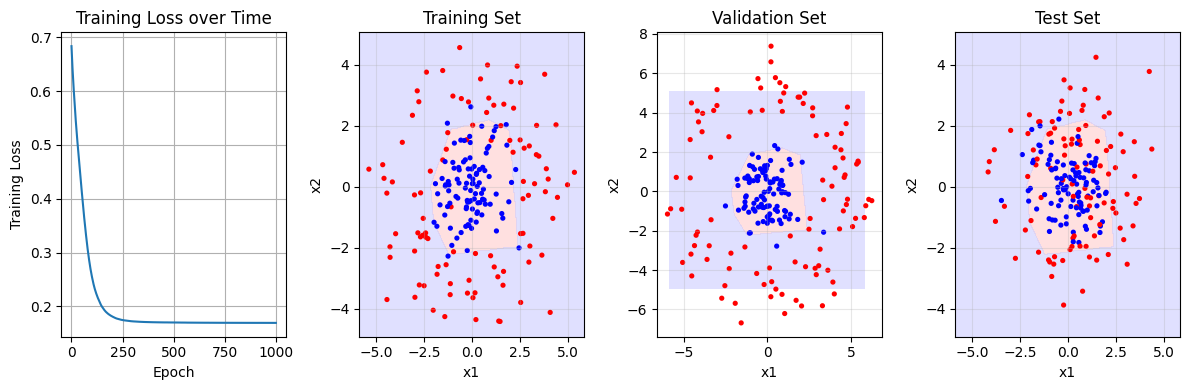


Training model with hidden layer size 5, iteration 2

Test Loss: 0.6966


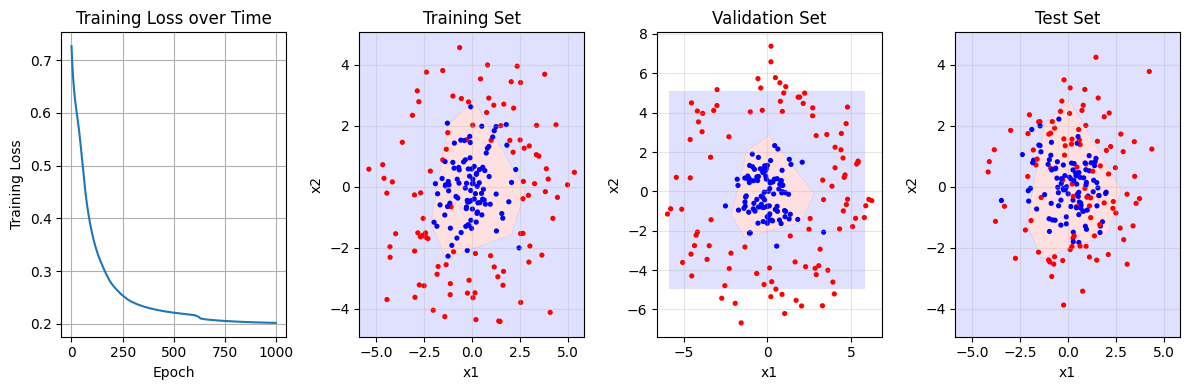


Training model with hidden layer size 5, iteration 3

Test Loss: 0.7422


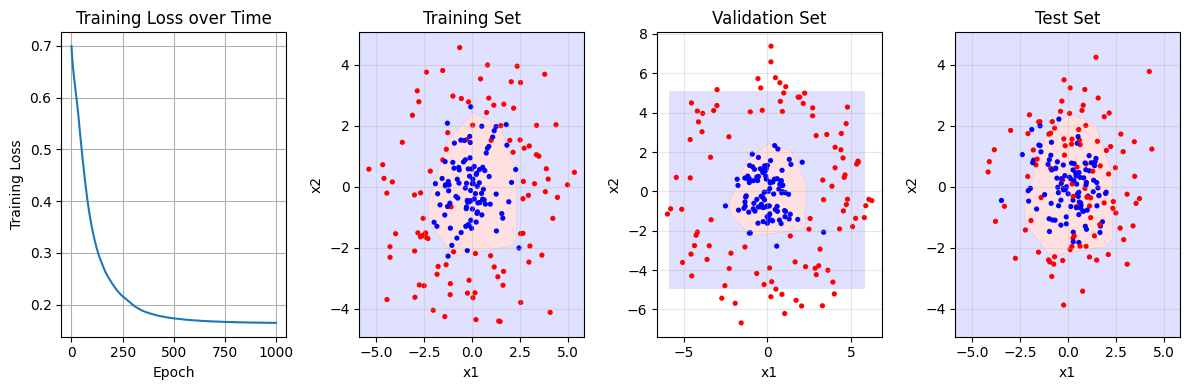


Training model with hidden layer size 6, iteration 1

Test Loss: 0.8622


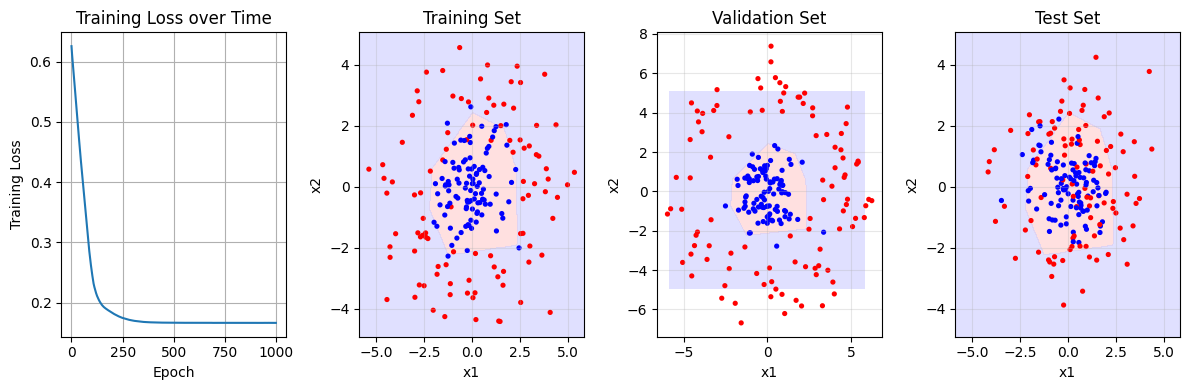


Training model with hidden layer size 6, iteration 2

Test Loss: 0.7818


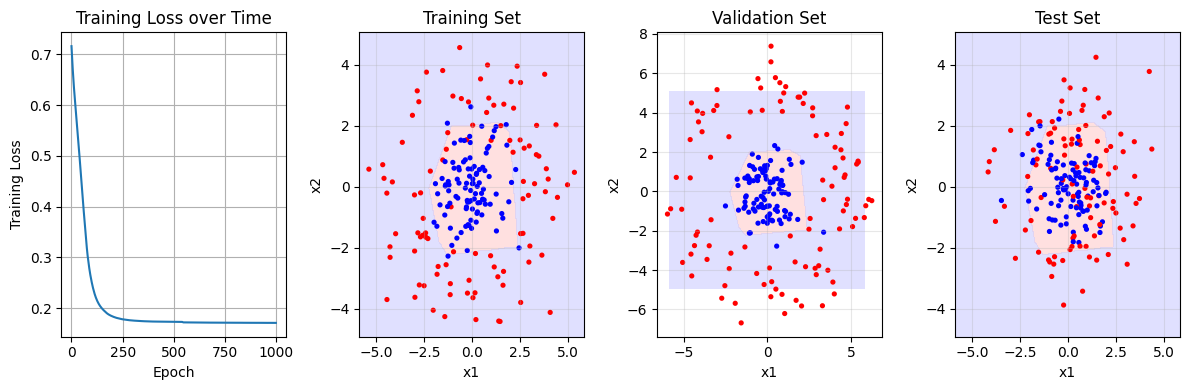


Training model with hidden layer size 6, iteration 3

Test Loss: 0.8904


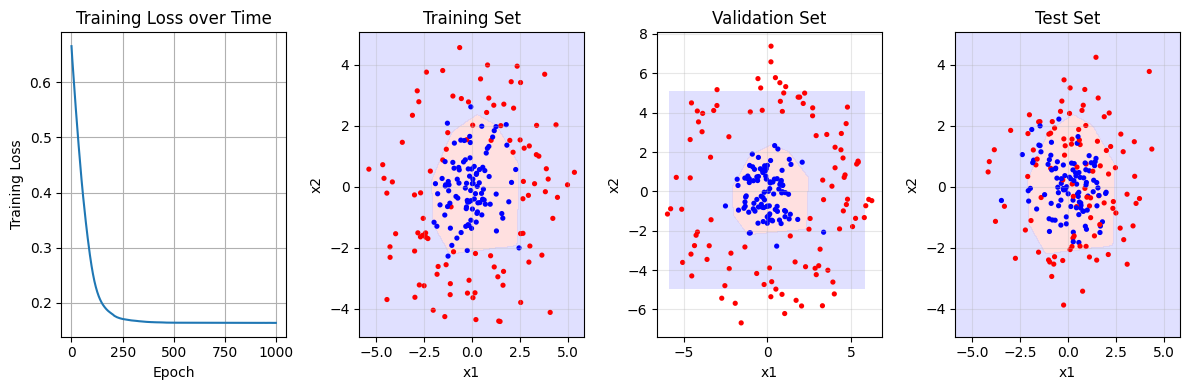


Training model with hidden layer size 7, iteration 1

Test Loss: 0.7131


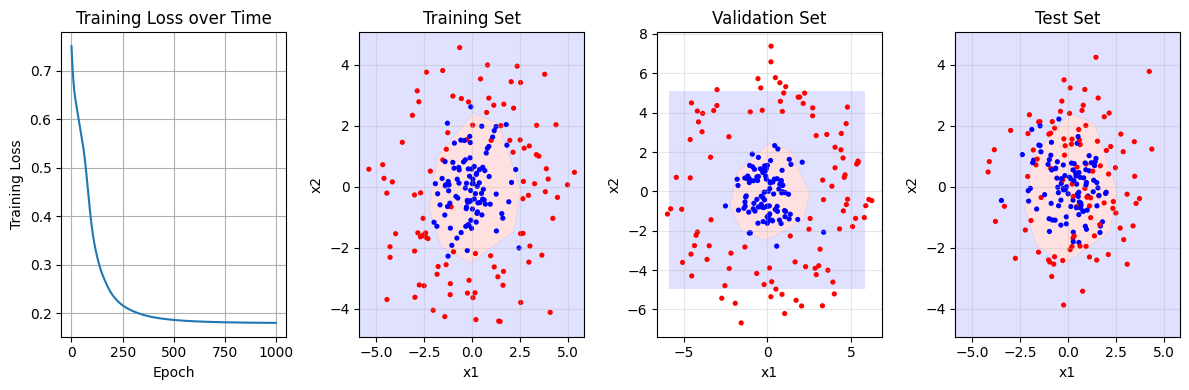


Training model with hidden layer size 7, iteration 2

Test Loss: 0.8816


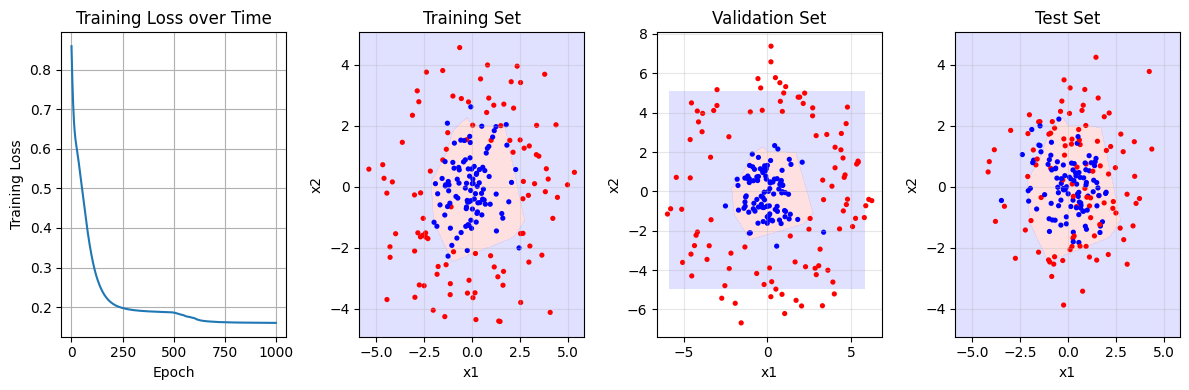


Training model with hidden layer size 7, iteration 3

Test Loss: 0.8224


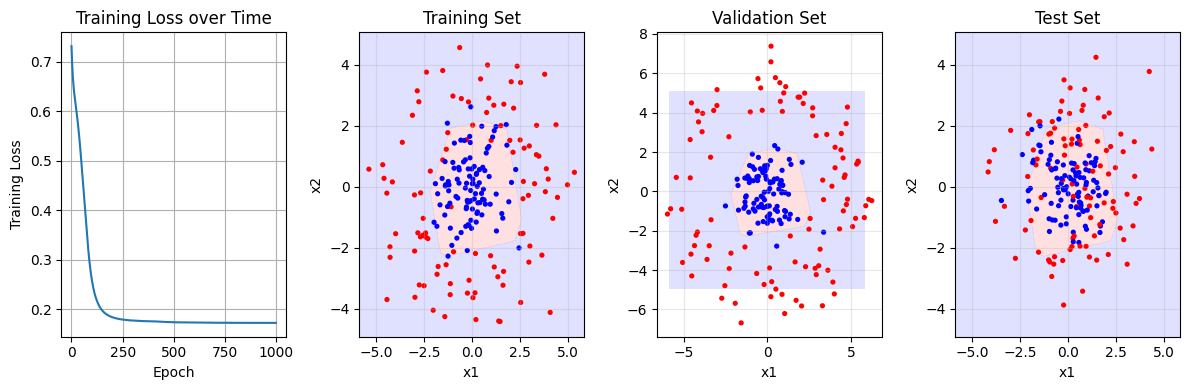

In [5]:
df_train = pd.read_csv('center_surround_train.csv')
df_test = pd.read_csv('center_surround_test.csv')
df_valid = pd.read_csv('center_surround_valid.csv')

X_train, y_train, X_test, y_test, X_valid, y_valid = convert_to_tensors(df_train, df_test, df_valid)
print(X_train.shape, y_train.shape, X_test.shape, X_valid.shape)
x1_grid, x2_grid, grid_tensor = create_meshgrid(X_train)

for i in range(2,8):
    for j in range(3):
        print(f'\nTraining model with hidden layer size {i}, iteration {j+1}')
        train_model(hl_size=i)

torch.Size([200, 2]) torch.Size([200]) torch.Size([200, 2]) torch.Size([200, 2])

Training model with hidden layer size 2, iteration 1

Test Loss: 0.3756


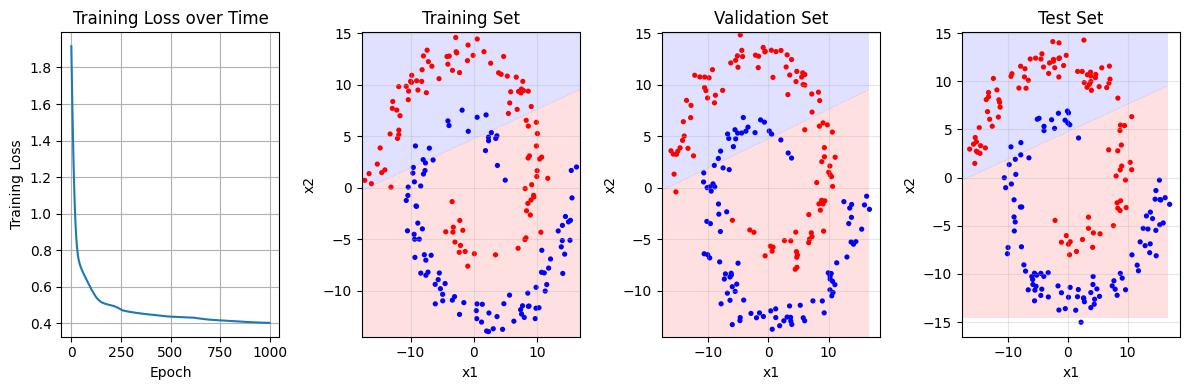


Training model with hidden layer size 2, iteration 2

Test Loss: 0.3559


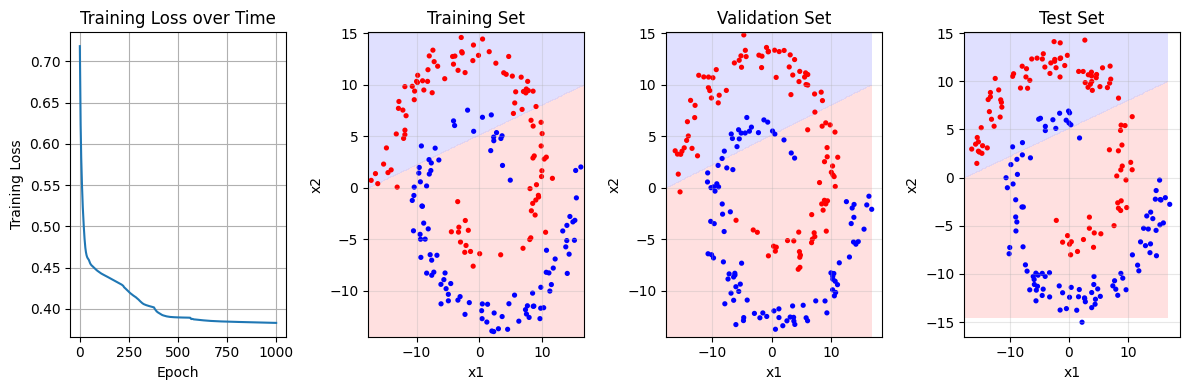


Training model with hidden layer size 2, iteration 3

Test Loss: 0.3584


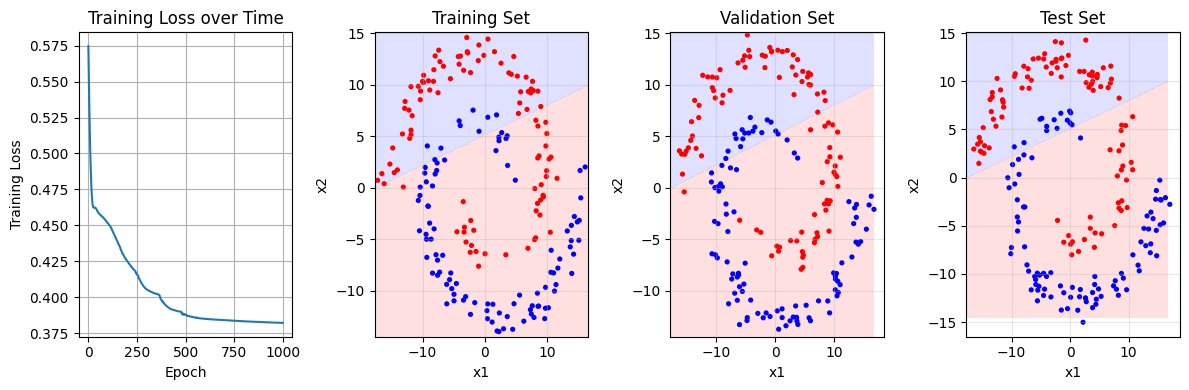


Training model with hidden layer size 3, iteration 1

Test Loss: 0.2770


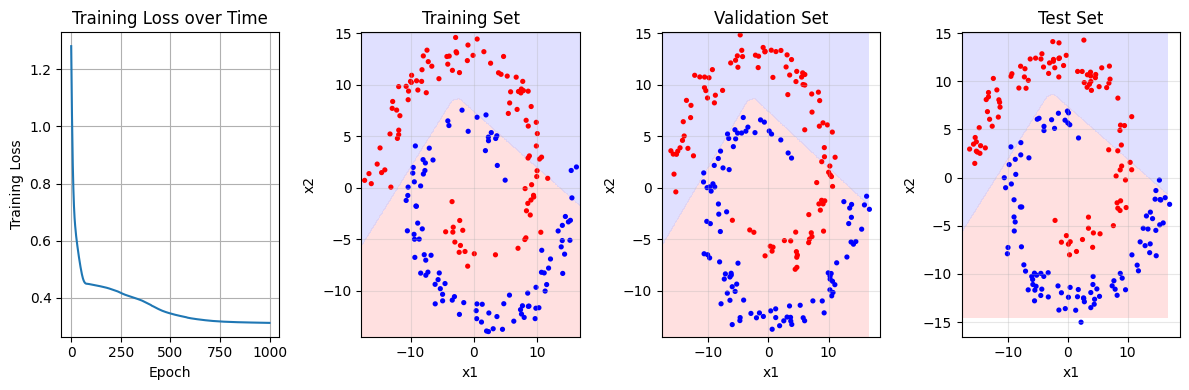


Training model with hidden layer size 3, iteration 2

Test Loss: 0.2508


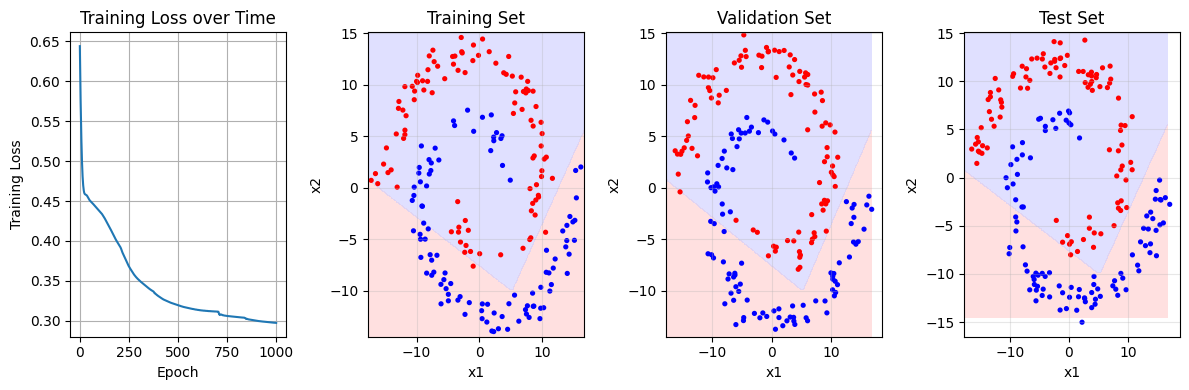


Training model with hidden layer size 3, iteration 3

Test Loss: 0.2492


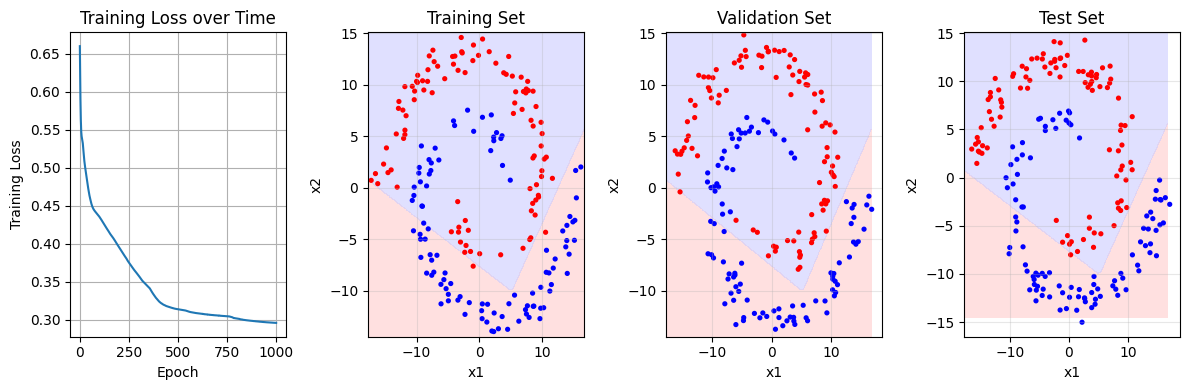


Training model with hidden layer size 4, iteration 1

Test Loss: 0.2139


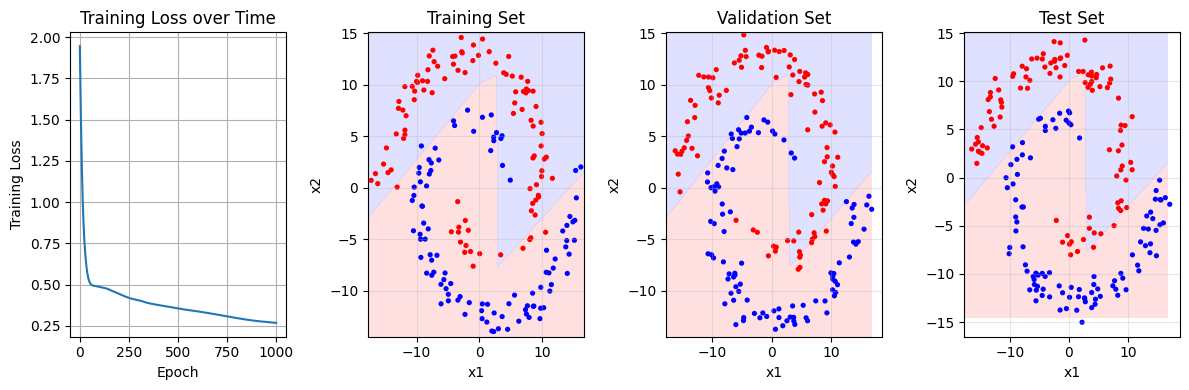


Training model with hidden layer size 4, iteration 2

Test Loss: 0.1987


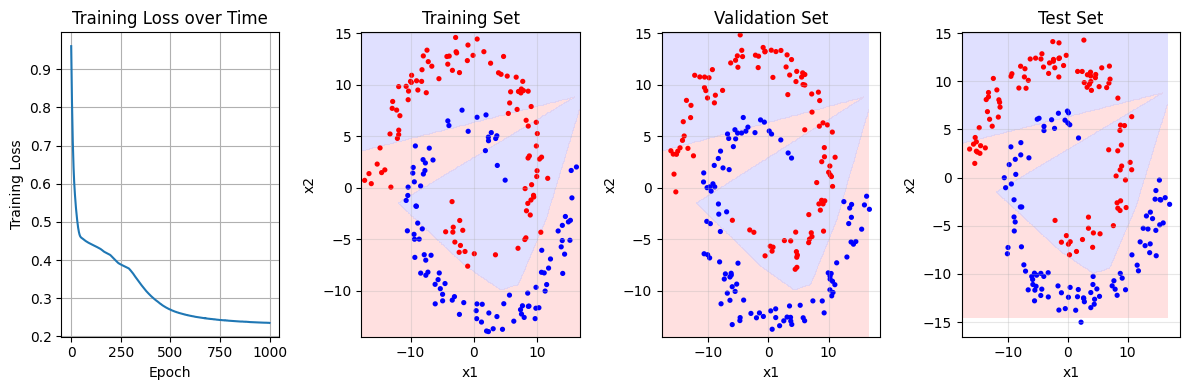


Training model with hidden layer size 4, iteration 3

Test Loss: 0.0638


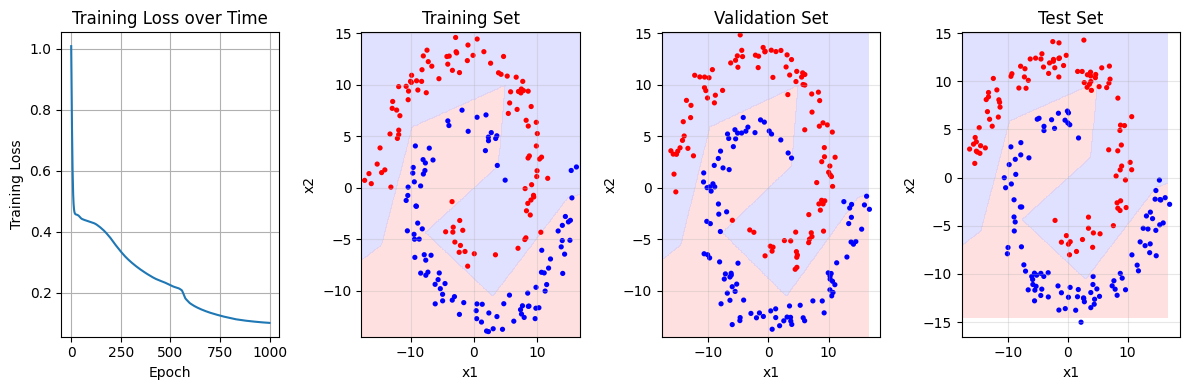


Training model with hidden layer size 5, iteration 1

Test Loss: 0.1574


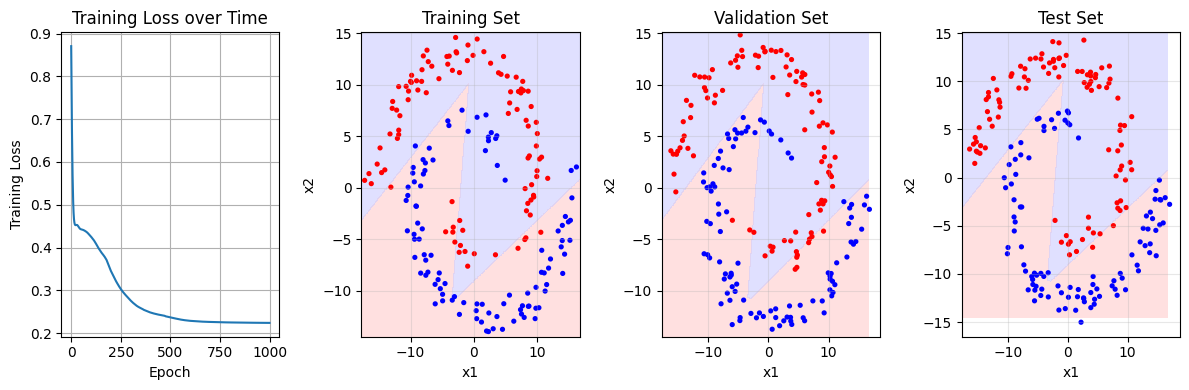


Training model with hidden layer size 5, iteration 2

Test Loss: 0.0329


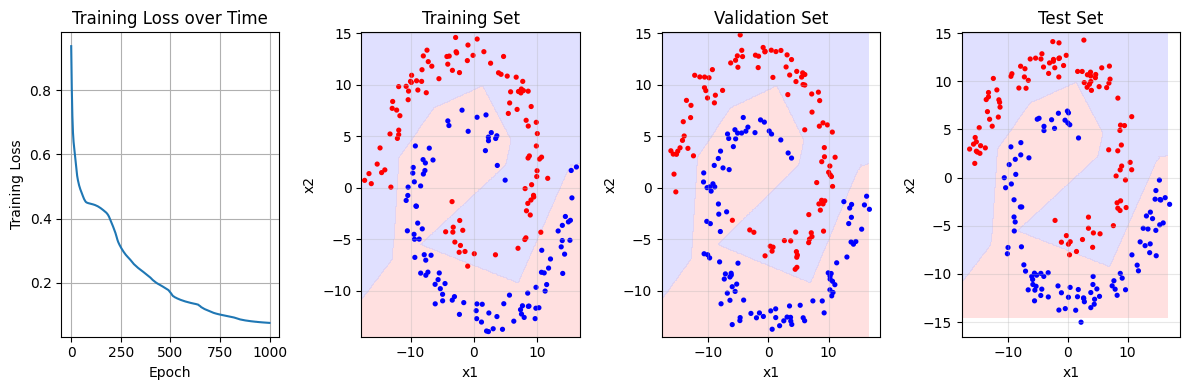


Training model with hidden layer size 5, iteration 3

Test Loss: 0.0460


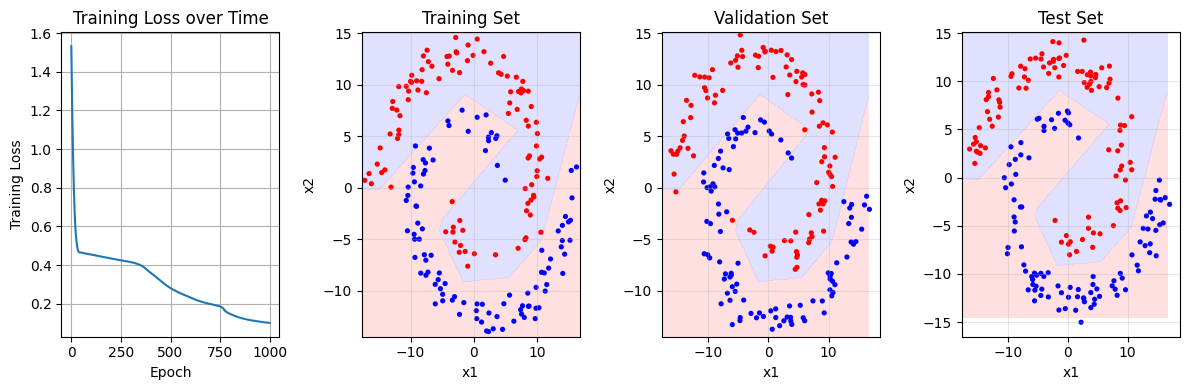


Training model with hidden layer size 6, iteration 1

Test Loss: 0.0411


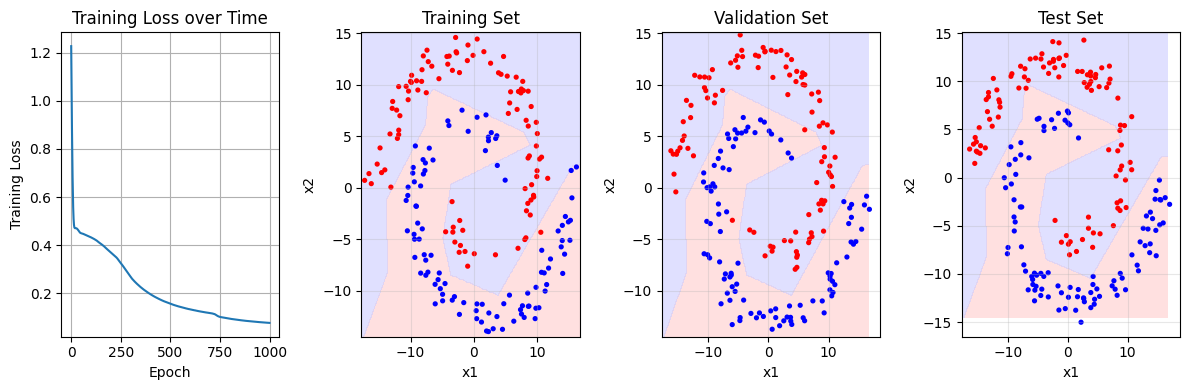


Training model with hidden layer size 6, iteration 2

Test Loss: 0.0167


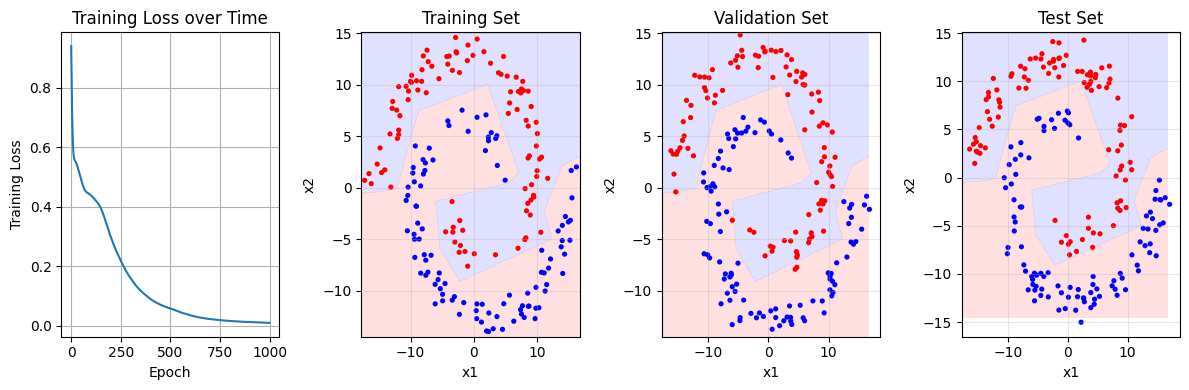


Training model with hidden layer size 6, iteration 3

Test Loss: 0.0215


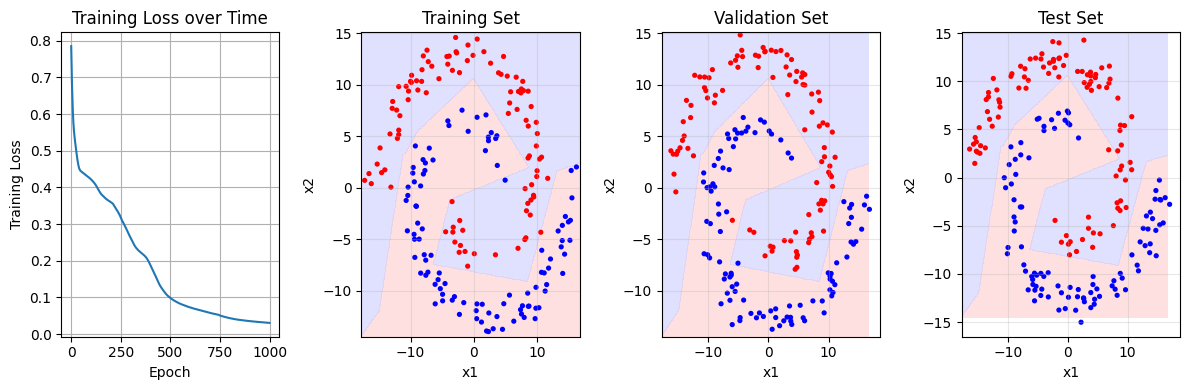


Training model with hidden layer size 7, iteration 1

Test Loss: 0.0369


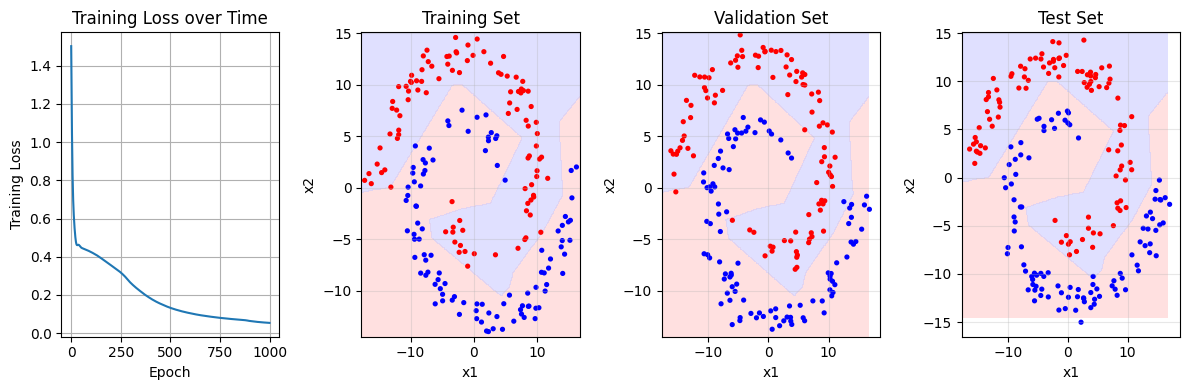


Training model with hidden layer size 7, iteration 2

Test Loss: 0.0171


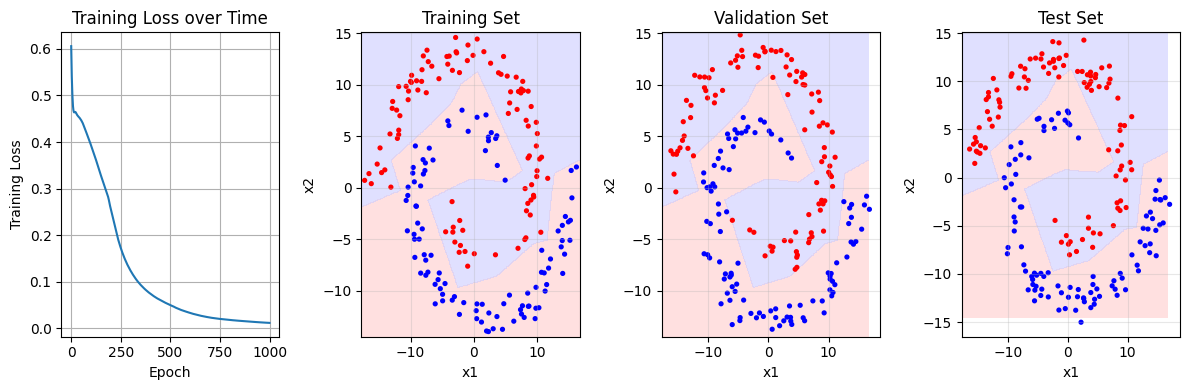


Training model with hidden layer size 7, iteration 3

Test Loss: 0.0191


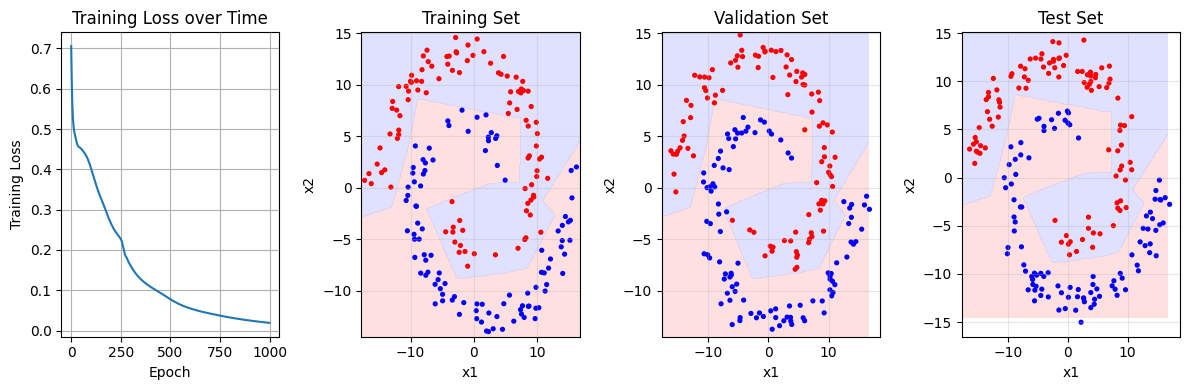

In [23]:
df_train = pd.read_csv('spiral_train.csv')
df_test = pd.read_csv('spiral_test.csv')
df_valid = pd.read_csv('spiral_valid.csv')

X_train, y_train, X_test, y_test, X_valid, y_valid = convert_to_tensors(df_train, df_test, df_valid)
print(X_train.shape, y_train.shape, X_test.shape, X_valid.shape)
x1_grid, x2_grid, grid_tensor = create_meshgrid(X_train)

for i in range(2,8):
    for j in range(3):
        print(f'\nTraining model with hidden layer size {i}, iteration {j+1}')
        train_model(hl_size=i)